Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3466 - loss: 1.7696 - val_accuracy: 0.5370 - val_loss: 1.2741
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5725 - loss: 1.2088 - val_accuracy: 0.5995 - val_loss: 1.1269
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6402 - loss: 1.0196 - val_accuracy: 0.6511 - val_loss: 0.9991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6817 - loss: 0.9115 - val_accuracy: 0.6524 - val_loss: 0.9970
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7037 - loss: 0.8463 - val_accuracy: 0.6823 - val_loss: 0.8982
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7309 - loss: 0.7640 - val_accuracy: 0.6892 - val_loss: 0.9044
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7452 - loss: 0.7177 - val_accuracy: 0.6987 - val_loss: 0.8825
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7641 -

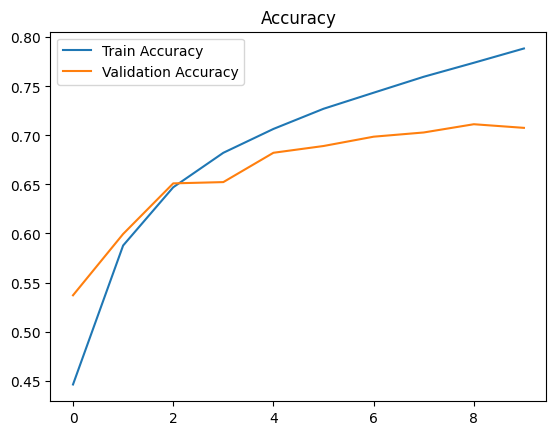

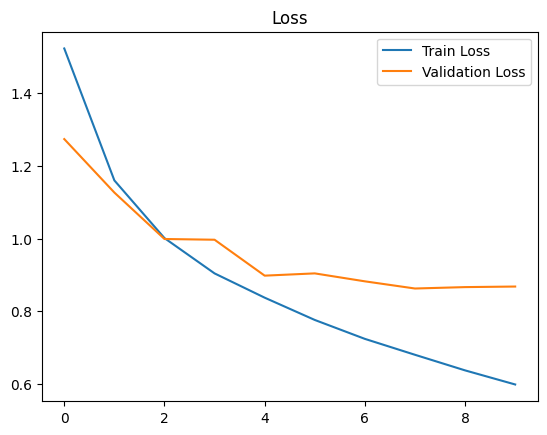

313/313 - 3s - 10ms/step - accuracy: 0.7077 - loss: 0.8682
Test accuracy: 0.71
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


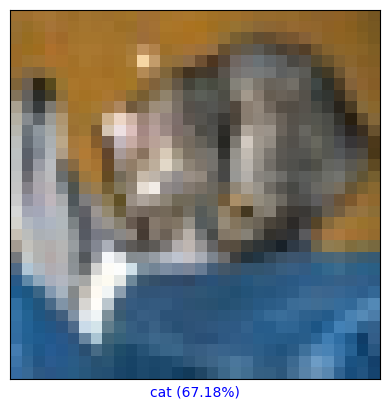

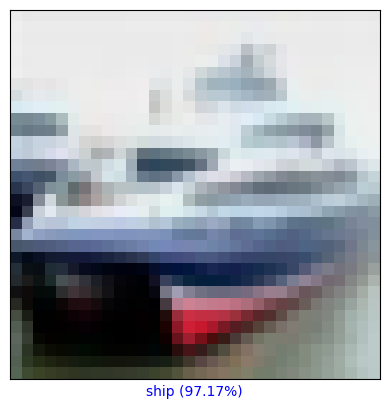

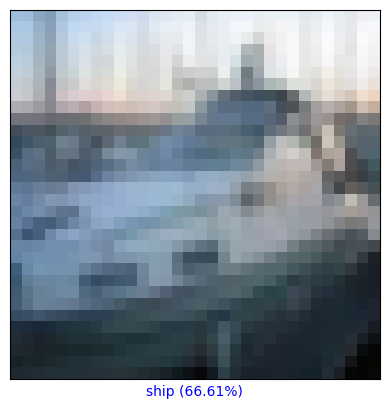

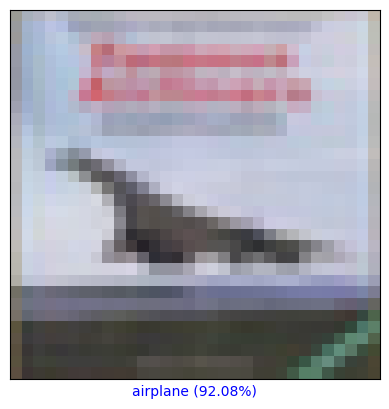

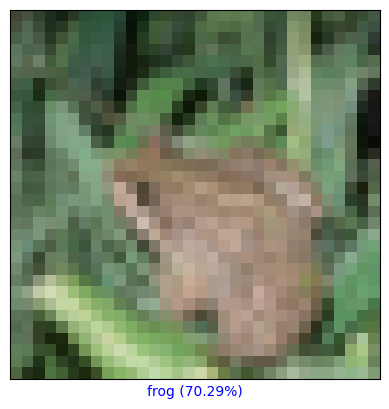

In [5]:
# Task2-Image Classification Using CNN in TensorFlow

# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Predict and visualize results
prob_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = prob_model.predict(x_test)

# Plot sample prediction
def plot_image(i, predictions_array, true_label, img):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)", color=color)

# Show 5 predictions
for i in range(5):
    plt.figure()
    plot_image(i, predictions[i], y_test, x_test[i])
    plt.show()
